In [11]:
import argparse
import pandas

# declare some column names
travelTime = 'travelTime'
startTime = 'startTime'
endTime = 'endTime'
id = 'personId'
tripNumber = 'tripNo'
mode = 'mainMode'
distance = 'distance'

def parse_args(args):
    parser = argparse.ArgumentParser()
    parser.add_argument('-f', '--files', nargs='+', required=True)
    parser.add_argument('-n', '--names', nargs='+', required=True)
    return parser.parse_args(args)

def read_csv(listOfFiles, listOfNames):
    
    assert(len(listOfFiles) == len(listOfNames)), 'number of files and scenario names should be equal but was: (' + str(len(listOfFiles)) + '/' + str(len(listOfNames)) + ')'
    
    result = []

    for file, name in zip(listOfFiles, listOfNames):
        scenario = pandas.read_csv(file, usecols=[id, tripNumber, distance, mode])
        scenario.set_index([id, tripNumber], inplace=True)
        scenario.sort_index(inplace=True)
        result.append(scenario)
    return result

In [12]:
dataFolder = "C:\\Users\\Janekdererste\\Desktop\\nemo_analysis\\"
args = parse_args([
    '-f', dataFolder + 'base-case.csv', dataFolder + 'sustainable.csv', dataFolder + 'deurbanisation-100.csv', dataFolder + 'smartCity.csv',
    '-n', 'Base Case', 'Gesund & Nachhaltig' , 'Deurbanisation', 'Smart City'
])

dataFrames = read_csv(args.files, args.names)
data = pandas.concat(dataFrames, keys=args.names, names=['RunId', id, tripNumber])
print(data.head(10))

                               distance mainMode
RunId     personId tripNo                       
Base Case 54804601 0       13001.306360      car
                   1        4781.294600      car
                   2        2302.954800      car
                   3        4047.200370      car
                   4        1608.864389      car
                   5       14864.202568      car
          54822301 0       19651.739046      car
                   1        9440.114341      car
                   2       12267.871932      car
          54847601 0       30129.437690      car


In [13]:
# select the mode and the distance
travelled_distances = data[[distance, mode]]
print(travelled_distances)

                                  distance mainMode
RunId      personId   tripNo                       
Base Case  54804601   0       13001.306360      car
                      1        4781.294600      car
                      2        2302.954800      car
                      3        4047.200370      car
                      4        1608.864389      car
...                                    ...      ...
Smart City 1444331801 3        2197.098074      car
           1444365301 0        7911.298393      car
                      1        7911.298393      car
                      2       11442.570637      car
                      3       11442.570637      car

[544397 rows x 2 columns]


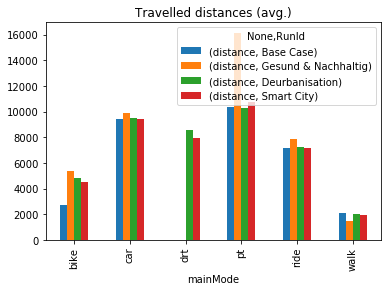

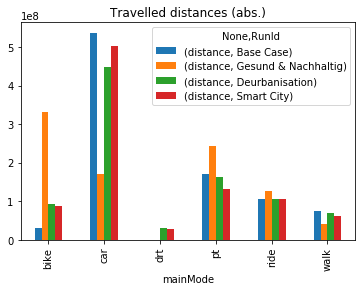

In [14]:
# group by mode and by run id
average = travelled_distances.groupby([mode, 'RunId']).mean()
# unstack the multi-index into two columns for both run ids and then plot
average.unstack(level='RunId').plot.bar(title='Travelled distances (avg.)')

absolute = travelled_distances.groupby([mode, 'RunId']).sum()

absolute.unstack(level='RunId').plot.bar(title='Travelled distances (abs.)')




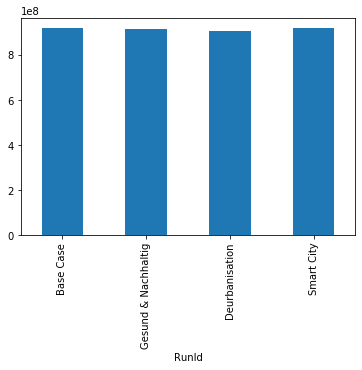

In [19]:
travelled_distances.unstack(level='RunId')[distance].sum().plot.bar()
